In [1]:
import pandas as pd
import seaborn as sbn
import numpy as np
from matplotlib import pyplot as plt

#### Reading dataset

In [2]:
df = pd.read_csv("dataset_covid_manaus.csv", delimiter = ';', encoding = 'ISO-8859-1', low_memory=False)

In [3]:
df.sample(10)

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_comorb_renal,_comorb_diabetes,_comorb_imuno,_comorb_cardio,_conclusao,...,_distrito,_bairro_mapa,_comorb_respiratoria,_comorb_cromossomica,_comorb_hepatica,_comorb_neurologica,_comorb_hemato,_comorb_obessidade,_origem,_evolução
71924,44.0,40a - 49a,F,ALVORADA,Confirmado,Não,Não,Não,Não,Recuperado,...,OESTE,ALVORADA,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
99156,25.0,20a - 29a,F,NOVA CIDADE,Descartado,NaN,NaN,NaN,NaN,NaN,...,NORTE,NOVA CIDADE,NaN,NaN,NaN,NaN,NaN,NaN,GAL,NaN
38615,73.0,70a - 79a,M,COLONIA ANTONIO ALEIXO,Descartado,Não,Sim,Não,Sim,Recuperado,...,LESTE,COLÔNIA ANTÔNIO ALEIXO,Sim,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
88940,36.0,30a - 39a,M,SANTO ANTONIO,Confirmado,Não,Não,Sim,Não,NaN,...,OESTE,SANTO ANTÔNIO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE, GAL",NaN
1819,43.0,40a - 49a,M,TARUMA,Descartado,Não,Não,Não,Não,Recuperado,...,OESTE,TARUMÃ,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
41669,37.0,30a - 39a,F,DISTRITO,Descartado,Não,Não,Não,Não,Recuperado,...,SUL,DISTRITO INDUSTRIAL I,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
66929,32.0,30a - 39a,M,SAO FRANCISCO,Em análise,Não,Não,Não,Não,NaN,...,SUL,SÃO FRANCISCO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
80945,23.0,20a - 29a,F,CACHOEIRINHA,Descartado,Não,Não,Não,Não,NaN,...,SUL,CACHOEIRINHA,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
78540,24.0,20a - 29a,F,PETROPOLIS,Descartado,Não,Não,Não,Não,Recuperado,...,SUL,PETRÓPOLIS,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
48873,37.0,30a - 39a,F,NOVA ESPERANCA,Descartado,Não,Não,Não,Não,NaN,...,OESTE,NOVA ESPERANÇA,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN


#### 2.1.1 How many attributes per row? Which are its names?

In [4]:
df.columns

Index(['_idade', '_faixa etária', '_sexo', '_bairro', '_classificacao',
       '_comorb_renal', '_comorb_diabetes', '_comorb_imuno', '_comorb_cardio',
       '_conclusao', '_dt_notificacao', '_taxa', '_dt_evolucao', '_raca',
       '_dt_sintomas', '_criterio', '_tipo_teste', '_sintoma_garganta',
       '_sintoma_dispneia', '_sintoma_febre', '_sintoma_tosse',
       '_sintoma_outros', '_etnia', '_profiss_saude', '_srag',
       '_se_notificacao', '_distrito', '_bairro_mapa', '_comorb_respiratoria',
       '_comorb_cromossomica', '_comorb_hepatica', '_comorb_neurologica',
       '_comorb_hemato', '_comorb_obessidade', '_origem', '_evolução'],
      dtype='object')

In [5]:
print(len(df.columns))

36


#### 2.1.2 How many confirmed cases are show in the table?

In [6]:
df[df._classificacao == 'Confirmado'].shape[0]

36947

#### 2.1.3 What is the oldest case. And the newest?

In [7]:
df['_dt_notificacao']

0         04/05/2020
1         01/05/2020
2         04/05/2020
3         04/05/2020
4         04/05/2020
             ...    
108346    01/06/2020
108347    25/05/2020
108348    04/05/2020
108349    05/06/2020
108350    03/04/2020
Name: _dt_notificacao, Length: 108351, dtype: object

In [8]:
sorted_dates = np.array(df['_dt_notificacao'].sort_values(na_position='first'))

In [9]:
sorted_dates_no_nan = np.array([e for e in sorted_dates if pd.isnull(e) is False])

In [10]:
sorted_dates_no_nan[0]

'01/03/2020'

In [11]:
sorted_dates_no_nan[len(sorted_dates_no_nan)-1]

'31/07/2020'

#### Deleting rows and columns which are not useful for our purposes

In [12]:
attributes_we_want = ['_idade', '_sexo', '_bairro', '_classificacao', '_dt_notificacao', '_tipo_teste', '_conclusao']

In [13]:
supp = []

for a in list(df.columns):
    if a in attributes_we_want:
        continue
    else:
        supp.append(a)
        
print(supp)

['_faixa etária', '_comorb_renal', '_comorb_diabetes', '_comorb_imuno', '_comorb_cardio', '_taxa', '_dt_evolucao', '_raca', '_dt_sintomas', '_criterio', '_sintoma_garganta', '_sintoma_dispneia', '_sintoma_febre', '_sintoma_tosse', '_sintoma_outros', '_etnia', '_profiss_saude', '_srag', '_se_notificacao', '_distrito', '_bairro_mapa', '_comorb_respiratoria', '_comorb_cromossomica', '_comorb_hepatica', '_comorb_neurologica', '_comorb_hemato', '_comorb_obessidade', '_origem', '_evolução']


In [14]:
clean_df = df.drop(['_faixa etária', '_comorb_renal', '_comorb_diabetes', '_comorb_imuno', '_comorb_cardio', '_taxa', '_dt_evolucao', '_raca', '_dt_sintomas', '_criterio', '_sintoma_garganta', '_sintoma_dispneia', '_sintoma_febre', '_sintoma_tosse', '_sintoma_outros', '_etnia', '_profiss_saude', '_srag', '_se_notificacao', '_distrito', '_bairro_mapa', '_comorb_respiratoria', '_comorb_cromossomica', '_comorb_hepatica', '_comorb_neurologica', '_comorb_hemato', '_comorb_obessidade', '_origem', '_evolução'], axis=1)

In [15]:
clean_df.head()

,_idade,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_tipo_teste
0,37.0,F,CONJ. CIDADAO 10,Confirmado,NaN,04/05/2020,TESTE RÁPIDO - ANTÍGENO
1,46.0,F,MORADA DO SOL,Descartado,Recuperado,01/05/2020,TESTE RÁPIDO - ANTÍGENO
2,51.0,F,NaN,Confirmado,NaN,04/05/2020,TESTE RÁPIDO - ANTICORPO
3,74.0,M,NaN,Confirmado,NaN,04/05/2020,TESTE RÁPIDO - ANTICORPO
4,51.0,F,ALEIXO,Confirmado,NaN,04/05/2020,TESTE RÁPIDO - ANTICORPO


In [16]:
clean_df = clean_df.dropna()

In [17]:
clean_df

,_idade,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_tipo_teste
1,46.0,F,MORADA DO SOL,Descartado,Recuperado,01/05/2020,TESTE RÁPIDO - ANTÍGENO
10,40.0,F,BETHANIA,Descartado,Recuperado,03/05/2020,TESTE RÁPIDO - ANTICORPO
14,35.0,F,CACHOEIRINHA,Descartado,Recuperado,03/05/2020,TESTE RÁPIDO - ANTICORPO
36,43.0,M,CHAPADA,Descartado,Recuperado,03/05/2020,RT-PCR
67,44.0,M,CHAPADA,Descartado,Recuperado,03/05/2020,TESTE RÁPIDO - ANTICORPO
...,...,...,...,...,...,...,...
108341,14.0,F,DA PAZ,Confirmado,Recuperado,25/06/2020,TESTE RÁPIDO - ANTÍGENO
108344,81.0,M,SANTA LUZIA,Descartado,Óbito,09/05/2020,RT-PCR
108346,68.0,M,JORGE TEIXEIRA,Confirmado,Recuperado,01/06/2020,RT-PCR
108349,45.0,F,TARUMA,Confirmado,Recuperado,05/06/2020,TESTE RÁPIDO - ANTICORPO


#### 2.1.1 How many rows and columns last after cleaning?

In [18]:
clean_df.shape

(33925, 7)

#### 2.1.2 How many recovered people in percentage?

In [19]:
rec_series = clean_df[clean_df._conclusao == 'Recuperado']
rec = len(rec_series)
total = 33925
ans = rec/total * 100.0
print(ans)

99.94104642593958


#### 2.1.3 Which genre had most confirmed cases?

In [20]:
conf_cases = clean_df[clean_df._classificacao == 'Confirmado']

male = conf_cases[conf_cases._sexo == 'M']
fale = conf_cases[conf_cases._sexo == 'F']

print(f"Female cases: {len(fale)}")
print(f"Male cases: {len(male)}")

Female cases: 3645
Male cases: 2777


#### 2.1.4 What is the youngest and oldest person who had a confirmed case? What is the mean and standard deviation of all confirmed cases?

In [21]:
ages = np.sort(conf_cases._idade)
print(f"Yougest: {ages[0]}")
print(f"Oldest: {ages[len(ages)-1]}")

Yougest: 0.0
Oldest: 99.0


In [22]:
print(f"Mean: {np.mean(ages)}")

Mean: 41.433821239489255


In [23]:
print(f"Std: {np.std(ages)}")

Std: 14.155360848072508


#### 2.1.5 Which neighbourhood had more confirmed cases?

In [24]:
neigh_cases = conf_cases.groupby('_bairro')['_classificacao'].count()

In [25]:
neigh_cases.sort_values(ascending=False)

_bairro
CIDADE NOVA            301
FLORES                 266
TARUMA                 225
PETROPOLIS             193
ALEIXO                 172
                      ... 
PAQUE 10                 1
PAR DAS LARANJEIRA       1
PARQ. DEZ DE NOVEMB      1
PARQ. LARANJEIRAS        1
ADRIANOPOLES             1
Name: _classificacao, Length: 506, dtype: int64

#### 2.1.6 Which are top 3 neibourhood that had more recovered cases?

In [26]:
neigh_cases_rec = conf_cases.groupby(['_bairro', '_conclusao'])['_classificacao'].count()

In [27]:
neigh_cases_rec.sort_values(ascending=False)

_bairro              _conclusao
CIDADE NOVA          Recuperado    301
FLORES               Recuperado    266
TARUMA               Recuperado    225
PETROPOLIS           Recuperado    192
ALEIXO               Recuperado    171
                                  ... 
PAQUE 10             Recuperado      1
PAR DAS LARANJEIRA   Recuperado      1
PARQ. DEZ DE NOVEMB  Recuperado      1
PARQ. LARANJEIRAS    Recuperado      1
ADRIANOPOLES         Recuperado      1
Name: _classificacao, Length: 516, dtype: int64

#### 2.1.7 What is the test applied types by name? Display the absolute and percetage values.

In [28]:
test_types = clean_df.groupby('_tipo_teste')['_tipo_teste'].count()

In [29]:
test_types

_tipo_teste
ECLIA IgG                      11
ELISA IgM                      27
RT-PCR                       4720
TESTE RÁPIDO - ANTICORPO    24756
TESTE RÁPIDO - ANTÍGENO      4411
Name: _tipo_teste, dtype: int64

In [30]:
total_tests = np.sum(test_types)
test_name = ['ECLIA IgG', 'ELISA IgM', 'RT-PCR', 'TESTE RÁPIDO - ANTICORPO', 'TESTE RÁPIDO - ANTÍGENO']

In [31]:
perc_test = [(t/total_tests * 100) for t in test_types]

In [32]:
arrado = np.array([test_name, test_types, perc_test])
arrado = arrado.transpose()

In [33]:
pd.DataFrame(arrado, columns=['test_name', 'abs values', 'perc (%) values'])

,test_name,abs values,perc (%) values
0,ECLIA IgG,11,0.032424465733235076
1,ELISA IgM,27,0.079587324981577
2,RT-PCR,4720,13.91304347826087
3,TESTE RÁPIDO - ANTICORPO,24756,72.97273397199704
4,TESTE RÁPIDO - ANTÍGENO,4411,13.002210759027266


#### 2.1.8 What is death rate?

In [34]:
deaths = conf_cases[conf_cases._conclusao == 'Óbito'].count()
total = conf_cases.count()

In [35]:
deaths[0]/total[0] * 100.0

0.20242914979757085

#### 2.1.9 What is the Pearson correlation between age and number os cases?

In [36]:
age_cases = conf_cases.groupby(['_idade']).count()

In [37]:
age_cases.head(10)

,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_tipo_teste
_idade,,,,,,
0.0,48,48,48,48,48,48
1.0,19,19,19,19,19,19
2.0,11,11,11,11,11,11
3.0,14,14,14,14,14,14
4.0,10,10,10,10,10,10
5.0,11,11,11,11,11,11
6.0,6,6,6,6,6,6
7.0,11,11,11,11,11,11
8.0,5,5,5,5,5,5


In [38]:
age_cases.index

Float64Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0,
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0,
              22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0,
              33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0,
              44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0,
              55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0,
              66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0,
              77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0,
              88.0, 89.0, 90.0, 92.0, 93.0, 94.0, 96.0, 97.0, 99.0],
             dtype='float64', name='_idade')

In [39]:
age_cases.values.transpose()[0]

array([ 48,  19,  11,  14,  10,  11,   6,  11,   5,   6,   8,   5,   9,
        12,  15,  14,  15,  27,  26,  16,  43,  50,  55,  70,  92, 112,
        95, 114, 134, 126, 123, 145, 155, 149, 149, 170, 179, 185, 213,
       213, 215, 205, 202, 198, 196, 192, 212, 170, 169, 141, 143, 119,
       128, 135, 113, 108,  92,  92,  76,  68,  64,  49,  49,  50,  32,
        43,  33,  31,  24,  22,  20,  19,  17,  14,   8,  12,  15,   7,
        10,   6,   8,  10,   8,   2,   7,   5,   4,   4,   3,   4,   1,
         2,   1,   1,   1,   1,   1], dtype=int64)

In [40]:
age_case_corr = pd.DataFrame(data=np.array([age_cases.index, age_cases.values.transpose()[0]]).transpose(), columns=['idade', 'casos'])

In [41]:
age_case_corr['idade'].corr(age_case_corr['casos'])

-0.2258984278924331

In [42]:
# O resultado é um valor negativo próximo de zero.
# Isso demonstra que as variáveis possuem uma leve relação inversamente proporcional.

#### 2.2.1 Plot a histogram of top 10 cases number by districts. The remaning districts must be in a bar denoted by "others". The information must be in percentages.

In [43]:
neigh_cases.sort_values(ascending=False).head(10)

_bairro
CIDADE NOVA          301
FLORES               266
TARUMA               225
PETROPOLIS           193
ALEIXO               172
NOVO ALEIXO          170
JORGE TEIXEIRA       169
SAO JOSE OPERARIO    169
COROADO              168
COMPENSA             166
Name: _classificacao, dtype: int64

In [44]:
hist = list(neigh_cases.sort_values(ascending=False).head(10))
print(hist)

[301, 266, 225, 193, 172, 170, 169, 169, 168, 166]


In [45]:
nbs = ['CN', 'FL', 'TA', 'PT', 'AL', 'NAL', 'JT', 'SJO', 'COR', 'COM', 'Others']

In [46]:
others = np.sum(neigh_cases.sort_values(ascending=False).tail(496))
print(others)

4423


In [47]:
hist.append(others)
print(hist)

[301, 266, 225, 193, 172, 170, 169, 169, 168, 166, 4423]


In [48]:
total = sum(hist)
print(total)

6422


Text(0.5, 1.0, 'Distribution of confirmed cases per district')

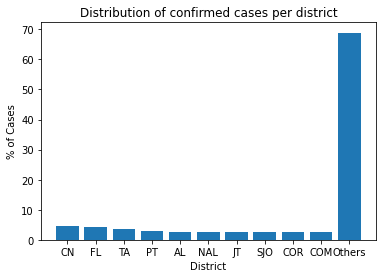

In [49]:
plt.bar(nbs, [x/total * 100 for x in hist])
plt.xlabel("District")
plt.ylabel("% of Cases")
plt.title("Distribution of confirmed cases per district")

#### 2.2.2 Plot a boxplot of ages of confirmed cases per genre. Is there any outlier?

In [50]:
male_age = conf_cases[conf_cases._sexo == 'M'][['_idade']]
fale_age = conf_cases[conf_cases._sexo == 'F'][['_idade']]

In [51]:
male_age = male_age.values.flatten()
fale_age = fale_age.values.flatten()

In [52]:
data = np.concatenate((male_age, fale_age))

C:\Users\joutv\Anaconda3\envs\rna_pp1\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'whiskers': [<matplotlib.lines.Line2D at 0x20a3a1bca08>,
 'caps': [<matplotlib.lines.Line2D at 0x20a3a1c6fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a3a1bc888>,
 'medians': [<matplotlib.lines.Line2D at 0x20a3a1c9908>,
 'fliers': [<matplotlib.lines.Line2D at 0x20a3a1c9e08>,
 'means': []}

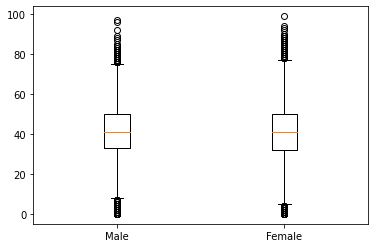

In [53]:
plt.boxplot((male_age, fale_age), sym="o", labels=["Male", "Female"])

#### 2.2.3 Plot the number of new cases per day (on the last 10 days).

In [54]:
clean_df

,_idade,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_tipo_teste
1,46.0,F,MORADA DO SOL,Descartado,Recuperado,01/05/2020,TESTE RÁPIDO - ANTÍGENO
10,40.0,F,BETHANIA,Descartado,Recuperado,03/05/2020,TESTE RÁPIDO - ANTICORPO
14,35.0,F,CACHOEIRINHA,Descartado,Recuperado,03/05/2020,TESTE RÁPIDO - ANTICORPO
36,43.0,M,CHAPADA,Descartado,Recuperado,03/05/2020,RT-PCR
67,44.0,M,CHAPADA,Descartado,Recuperado,03/05/2020,TESTE RÁPIDO - ANTICORPO
...,...,...,...,...,...,...,...
108341,14.0,F,DA PAZ,Confirmado,Recuperado,25/06/2020,TESTE RÁPIDO - ANTÍGENO
108344,81.0,M,SANTA LUZIA,Descartado,Óbito,09/05/2020,RT-PCR
108346,68.0,M,JORGE TEIXEIRA,Confirmado,Recuperado,01/06/2020,RT-PCR
108349,45.0,F,TARUMA,Confirmado,Recuperado,05/06/2020,TESTE RÁPIDO - ANTICORPO


In [55]:
cases_per_day = clean_df.drop(columns=['_idade', '_sexo', '_bairro', '_conclusao', '_tipo_teste'])

In [56]:
cases_per_day.head(20)

,_classificacao,_dt_notificacao
1,Descartado,01/05/2020
10,Descartado,03/05/2020
14,Descartado,03/05/2020
36,Descartado,03/05/2020
67,Descartado,03/05/2020
68,Descartado,03/05/2020
69,Descartado,03/05/2020
70,Descartado,03/05/2020
71,Descartado,03/05/2020
143,Descartado,27/04/2020


In [57]:
cases_per_day['_dt_notificacao'] = pd.to_datetime(cases_per_day['_dt_notificacao'], dayfirst=True)

In [58]:
cases_per_day

,_classificacao,_dt_notificacao
1,Descartado,2020-05-01
10,Descartado,2020-05-03
14,Descartado,2020-05-03
36,Descartado,2020-05-03
67,Descartado,2020-05-03
...,...,...
108341,Confirmado,2020-06-25
108344,Descartado,2020-05-09
108346,Confirmado,2020-06-01
108349,Confirmado,2020-06-05


In [59]:
porra = 0
for i in cases_per_day._dt_notificacao.dt.month:
    if i == 2:
        porra += 1
print(porra)

4


In [60]:
cases_per_day

,_classificacao,_dt_notificacao
1,Descartado,2020-05-01
10,Descartado,2020-05-03
14,Descartado,2020-05-03
36,Descartado,2020-05-03
67,Descartado,2020-05-03
...,...,...
108341,Confirmado,2020-06-25
108344,Descartado,2020-05-09
108346,Confirmado,2020-06-01
108349,Confirmado,2020-06-05


In [61]:
caralhos = cases_per_day.sort_values(by='_dt_notificacao')

In [62]:
caralhos

,_classificacao,_dt_notificacao
107318,Confirmado,2020-01-30
107538,Descartado,2020-02-04
77211,Confirmado,2020-02-16
107435,Descartado,2020-02-28
34841,Descartado,2020-02-28
...,...,...
108023,Descartado,2020-07-21
107433,Confirmado,2020-07-24
108123,Confirmado,2020-07-24
107461,Confirmado,2020-07-30


In [63]:
days_group = caralhos.groupby('_dt_notificacao').count()

In [64]:
days_group.tail(20)

,_classificacao
_dt_notificacao,
2020-06-24,573
2020-06-25,628
2020-06-26,657
2020-06-27,260
2020-06-28,42
2020-06-29,628
2020-06-30,598
2020-07-01,373
2020-07-02,488


In [65]:
bar_days = days_group.tail(17).values

In [66]:
bar_days = bar_days.flatten()

In [67]:
bar_days

array([260,  42, 628, 598, 373, 488, 555, 136,  36, 494,   1,   1,   1,
         1,   2,   1,   1], dtype=int64)

In [68]:
bar_days = np.delete(bar_days, [i for i in range(10,17)])

In [69]:
days = ['2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06']

In [70]:
bar_days = list(bar_days)

In [71]:
bar_days

[260, 42, 628, 598, 373, 488, 555, 136, 36, 494]

In [72]:
diff = []

for i in range(1, len(bar_days)):
    diff.append(bar_days[i] - bar_days[i-1])
    
print(diff)

[-218, 586, -30, -225, 115, 67, -419, -100, 458]


Text(0, 0.5, 'Date')

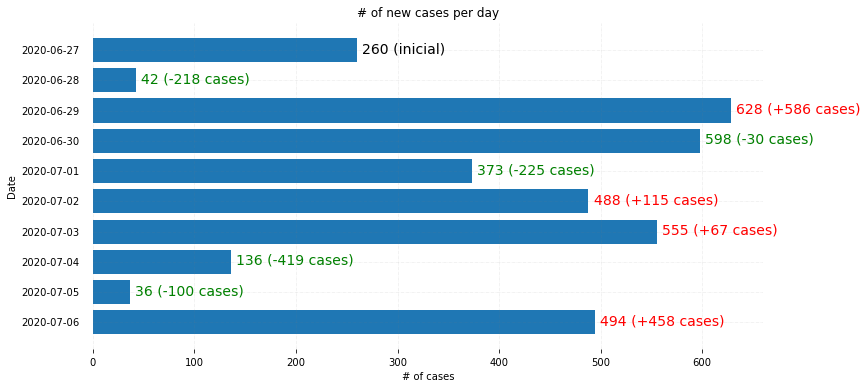

In [73]:
y_axis = days 
x_axis = bar_days
  
# Figure Size 
fig, ax = plt.subplots(figsize =(12, 6)) 
  
# Horizontal Bar Plot 
ax.barh(y_axis, x_axis) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# Remove y ticks
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2) 
  
# Show at middle
ax.invert_yaxis() 
  
# Add annotation to bars
clr = 'black'
difa = 'inicial'
for i, j in zip(ax.patches, range(10)):
    if j > 0 :
        if diff[j-1] < 0:
            clr = 'green'
            difa = str(diff[j-1]) + ' cases'
        elif diff[j-1] > 0:
            clr = 'red'
            difa = '+' + str(diff[j-1]) + ' cases'
        else:
            clr = 'black'
    plt.text(i.get_width()+5, i.get_y()+0.5,  
             str(i.get_width()) + f' ({difa})', 
             fontsize = 14, fontweight ='normal', 
             color = clr) 
    
# Add Plot Title 
ax.set_title('# of new cases per day', loc ='center') 
ax.set_xlabel('# of cases')
ax.set_ylabel('Date')

#### 2.2.4 Plot the number of recovered cases per day (on the last 10 days).

In [74]:
rec_per_day = clean_df.drop(columns=['_idade', '_sexo', '_bairro', '_classificacao', '_tipo_teste'])

In [75]:
rec_per_day

,_conclusao,_dt_notificacao
1,Recuperado,01/05/2020
10,Recuperado,03/05/2020
14,Recuperado,03/05/2020
36,Recuperado,03/05/2020
67,Recuperado,03/05/2020
...,...,...
108341,Recuperado,25/06/2020
108344,Óbito,09/05/2020
108346,Recuperado,01/06/2020
108349,Recuperado,05/06/2020


In [76]:
rec_per_day['_dt_notificacao'] = pd.to_datetime(rec_per_day['_dt_notificacao'], dayfirst=True)

In [77]:
rec_per_day

,_conclusao,_dt_notificacao
1,Recuperado,2020-05-01
10,Recuperado,2020-05-03
14,Recuperado,2020-05-03
36,Recuperado,2020-05-03
67,Recuperado,2020-05-03
...,...,...
108341,Recuperado,2020-06-25
108344,Óbito,2020-05-09
108346,Recuperado,2020-06-01
108349,Recuperado,2020-06-05


In [78]:
rec_per_day_sorted = rec_per_day.sort_values(by='_dt_notificacao')

In [79]:
rec_per_day_sorted

,_conclusao,_dt_notificacao
107318,Recuperado,2020-01-30
107538,Recuperado,2020-02-04
77211,Recuperado,2020-02-16
107435,Recuperado,2020-02-28
34841,Recuperado,2020-02-28
...,...,...
108023,Óbito,2020-07-21
107433,Óbito,2020-07-24
108123,Óbito,2020-07-24
107461,Óbito,2020-07-30


In [80]:
ora_porra = rec_per_day_sorted[rec_per_day_sorted._conclusao == 'Recuperado'].groupby('_dt_notificacao').count()

In [81]:
ora_porra.tail(10)

,_conclusao
_dt_notificacao,
2020-06-27,260
2020-06-28,41
2020-06-29,628
2020-06-30,598
2020-07-01,373
2020-07-02,488
2020-07-03,555
2020-07-04,136
2020-07-05,36


In [82]:
aux = list(ora_porra.tail(10).values.flatten())

In [83]:
diff2 = [bar_days[i] - aux[i] for i in range(10)]
print(diff2)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


Text(0, 0.5, 'Date')

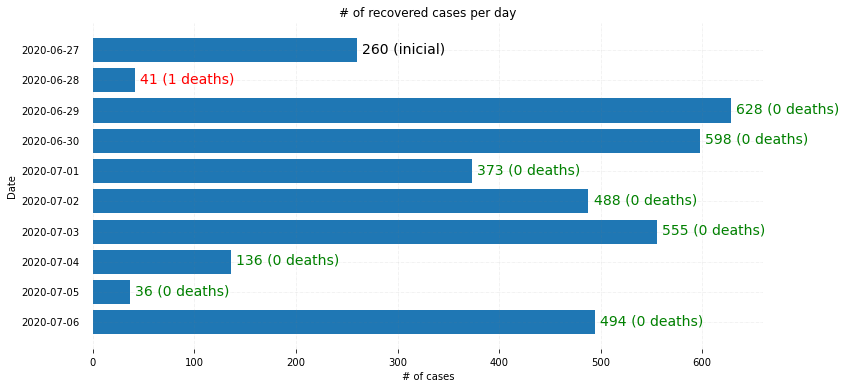

In [84]:
y_axis = days 
x_axis = aux
  
# Figure Size 
fig, ax = plt.subplots(figsize =(12, 6)) 
  
# Horizontal Bar Plot 
ax.barh(y_axis, x_axis) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# Remove y ticks
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2) 
  
# Show at middle
ax.invert_yaxis() 
  
# Add annotation to bars
clr = 'black'
difa = 'inicial'
for i, j in zip(ax.patches, range(10)):
    if j > 0:    
        if diff2[j] > 0:
            clr = 'red'
            difa = str(diff2[j]) + ' deaths'
        elif diff2[j] <= 0:
            clr = 'green'
            difa = str(diff2[j]) + ' deaths'
        else:
            clr = 'black'
    plt.text(i.get_width()+5, i.get_y()+0.5,  
             str(i.get_width()) + f' ({difa})', 
             fontsize = 14, fontweight ='normal', 
             color = clr) 
    
# Add Plot Title 
ax.set_title('# of recovered cases per day', loc ='center') 
ax.set_xlabel('# of cases')
ax.set_ylabel('Date')

#### 2.2.5 Plot a histogram that shows the number of cases by age range (0-10 yo, 11-20 yo, ...).

In [87]:
cases_by_age = clean_df.drop(columns=['_bairro', '_dt_notificacao', '_tipo_teste'])

In [98]:
cases_by_age

,_idade,_sexo,_classificacao,_conclusao
1,46.0,F,Descartado,Recuperado
10,40.0,F,Descartado,Recuperado
14,35.0,F,Descartado,Recuperado
36,43.0,M,Descartado,Recuperado
67,44.0,M,Descartado,Recuperado
...,...,...,...,...
108341,14.0,F,Confirmado,Recuperado
108344,81.0,M,Descartado,Óbito
108346,68.0,M,Confirmado,Recuperado
108349,45.0,F,Confirmado,Recuperado


In [97]:
counter = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for x in cases_by_age['_idade'].values:
    if x in range(0, 10): counter[0] += 1
    if x in range(10, 20): counter[1] += 1
    if x in range(20, 30): counter[2] += 1
    if x in range(30, 40): counter[3] += 1
    if x in range(40, 50): counter[4] += 1
    if x in range(50, 60): counter[5] += 1
    if x in range(60, 70): counter[6] += 1
    if x in range(70, 80): counter[7] += 1
    if x in range(80, 90): counter[8] += 1
    if x in range(90, 100): counter[9] += 1
    if x in range(100, 200): counter[10] += 1
        
print(counter)

[937, 1213, 5442, 9296, 8834, 5064, 2110, 751, 234, 35, 9]


In [99]:
perc_by_age = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(perc_by_age)):
    perc_by_age[i] = counter[i]/33925.0 * 100.0
    
print(perc_by_age)

[2.7619749447310245, 3.5755342667649224, 16.0412675018423, 27.40162122328666, 26.03979366249079, 14.927044952100221, 6.219602063375093, 2.2137067059690496, 0.6897568165070008, 0.10316875460574797, 0.026529108327192335]


Text(0, 0.5, '% of cases')

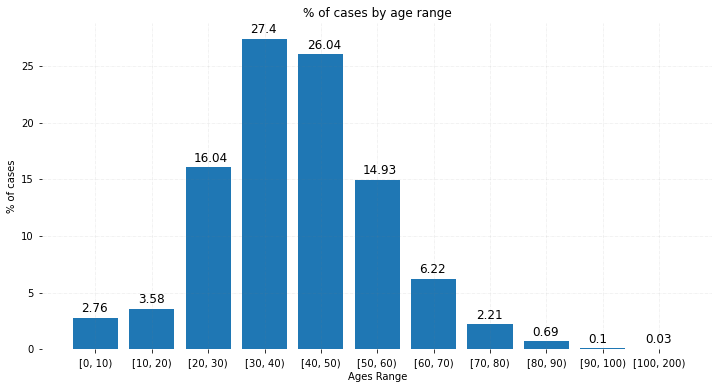

In [128]:
y_axis = perc_by_age
x_axis = ['[0, 10)', '[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)', '[50, 60)', 
          '[60, 70)', '[70, 80)', '[80, 90)', '[90, 100)', '[100, 200)']
  
# Figure Size 
fig, ax = plt.subplots(figsize =(12, 6)) 
  
# Vertical Bar Plot 
ax.bar(x_axis, y_axis) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
    
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 5) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2) 
  
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_x()+0.15, i.get_height()+0.5,
             str(round((i.get_height()), 2)), 
             fontsize = 12, fontweight ='normal', 
             color = 'black') 
    
# Add Plot Title 
ax.set_title('% of cases by age range', loc='center') 
ax.set_xlabel('Ages Range')
ax.set_ylabel('% of cases')

#### 2.2.6 Plot a graph that shows the cumulative cases alongside time.

In [147]:
alongside = days_group.values.flatten()

In [148]:
alongside

array([   1,    1,    1,    2,    1,    3,    2,    9,    1,    4,    1,
         11,    4,   19,    4,   10,    5,   14,   15,   19,   23,   22,
         18,   41,   46,   56,   62,   24,   39,   24,   48,   53,   64,
         40,   48,   41,   30,   94,   67,   69,   55,   77,   19,   54,
         74,   24,   75,   60,  118,   26,   30,  153,  163,  106,  120,
         36,   37,   78,  192,  323,  333,  390,  435,  381,  201,  336,
        722,  571,  474,  498,  149,   55,  552,  688,  762,  752,  897,
        380,  224,  773,  537, 1160, 1069,  936,  269,   96,  667,  716,
        538,  699,  616,  225,   92,  784,  773,  760,  130,  315,  234,
         66,  627, 1015,  805,  824,  519,  177,   56,  758,  557,  573,
        628,  657,  260,   42,  628,  598,  373,  488,  555,  136,   36,
        494,    1,    1,    1,    1,    2,    1,    1], dtype=int64)

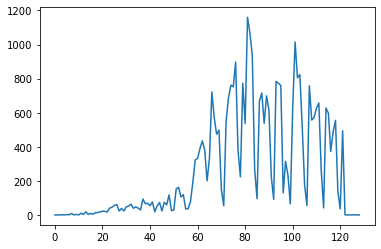

In [149]:
plt.plot(alongside)

In [151]:
x = list(alongside)
y = [x[0]]

for i in range(1,len(x)):
    y.append(x[i] + y[i-1])
        
print(y)

[1, 2, 3, 5, 6, 9, 11, 20, 21, 25, 26, 37, 41, 60, 64, 74, 79, 93, 108, 127, 150, 172, 190, 231, 277, 333, 395, 419, 458, 482, 530, 583, 647, 687, 735, 776, 806, 900, 967, 1036, 1091, 1168, 1187, 1241, 1315, 1339, 1414, 1474, 1592, 1618, 1648, 1801, 1964, 2070, 2190, 2226, 2263, 2341, 2533, 2856, 3189, 3579, 4014, 4395, 4596, 4932, 5654, 6225, 6699, 7197, 7346, 7401, 7953, 8641, 9403, 10155, 11052, 11432, 11656, 12429, 12966, 14126, 15195, 16131, 16400, 16496, 17163, 17879, 18417, 19116, 19732, 19957, 20049, 20833, 21606, 22366, 22496, 22811, 23045, 23111, 23738, 24753, 25558, 26382, 26901, 27078, 27134, 27892, 28449, 29022, 29650, 30307, 30567, 30609, 31237, 31835, 32208, 32696, 33251, 33387, 33423, 33917, 33918, 33919, 33920, 33921, 33923, 33924, 33925]


Text(0.5, 1.0, 'Cumulative cases per day')

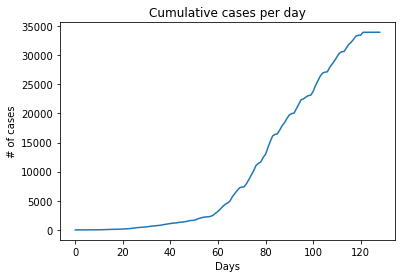

In [154]:
plt.plot(y)
plt.xlabel("Days")
plt.ylabel("# of cases")
plt.title("Cumulative cases per day")

#### 2.2.7 Plot a scatterplot that shows the age versus total number of cases. There exist any tendency?

In [155]:
age_cases.index

Float64Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0,
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0,
              22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0,
              33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0,
              44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0,
              55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0,
              66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0,
              77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0,
              88.0, 89.0, 90.0, 92.0, 93.0, 94.0, 96.0, 97.0, 99.0],
             dtype='float64', name='_idade')

In [156]:
age_cases.values.transpose()[0]

array([ 48,  19,  11,  14,  10,  11,   6,  11,   5,   6,   8,   5,   9,
        12,  15,  14,  15,  27,  26,  16,  43,  50,  55,  70,  92, 112,
        95, 114, 134, 126, 123, 145, 155, 149, 149, 170, 179, 185, 213,
       213, 215, 205, 202, 198, 196, 192, 212, 170, 169, 141, 143, 119,
       128, 135, 113, 108,  92,  92,  76,  68,  64,  49,  49,  50,  32,
        43,  33,  31,  24,  22,  20,  19,  17,  14,   8,  12,  15,   7,
        10,   6,   8,  10,   8,   2,   7,   5,   4,   4,   3,   4,   1,
         2,   1,   1,   1,   1,   1], dtype=int64)

Text(0, 0.5, '# of confirmed cases')

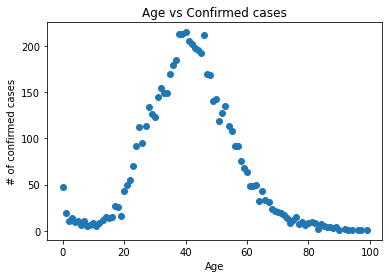

In [158]:
plt.scatter(age_cases.index, age_cases.values.transpose()[0])
plt.title("Age vs Confirmed cases")
plt.xlabel("Age")
plt.ylabel("# of confirmed cases")